# Descrição

Teste para validar ideia de long&short usando regressão linear e desvio padrão


# Possíveis pares: 

## Setor de Energia Elétrica:

Long: AES Tietê (TIET11), Energias do Brasil (ENBR3), Energisa (ENGI11)
Short: EDP Energias do Brasil (ENBR3), Cemig (CMIG4), Light (LIGT3)

## Setor de Construção Civil:

Long: MRV Engenharia (MRVE3), Cyrela Brazil Realty (CYRE3), Eztec (EZTC3)
Short: Gafisa (GFSA3), Tecnisa (TCSA3), Even (EVEN3)

## Setor de Varejo:

Long: Magazine Luiza (MGLU3), Lojas Americanas (LAME4), B2W Digital (BTOW3)
Short: Via Varejo (VVAR3), Arezzo (ARZZ3), Hering (HGTX3)

## Setor de Bancos:

Long: Itaú Unibanco (ITUB4), Banco Bradesco (BBDC4), Banco do Brasil (BBAS3)
Short: Banco Inter (BIDI11), Banco Pan (BPAN4), Banco BMG (BMGB4)

# Principais funções

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

def stock_analysis(stock1, stock2, days):
    # Coleta as informações de estoque dos últimos 45 dias
    start_date = pd.Timestamp.today() - pd.Timedelta(days=days)
    end_date = pd.Timestamp.today()
    
    stock1_data = yf.download(stock1, start=start_date, end=end_date)
    stock2_data = yf.download(stock2, start=start_date, end=end_date)

    # Calcula a divisão dos valores de fechamento das ações
    stock_division = stock1_data['Close'] / stock2_data['Close']

    # Calcula a regressão linear
    X = np.arange(len(stock_division)).reshape(-1, 1)
    y = stock_division.values.reshape(-1, 1)
    reg = LinearRegression().fit(X, y)
    linear_regression = reg.predict(X)

    # Calcula o desvio padrão
    std = stock_division.std()


    # Cria um DataFrame com os resultados
    result_df = pd.DataFrame({
        'Dia': stock_division.index,
        f'acao_1': stock1,
        f'valor_acao_1': stock1_data['Close'],
        f'acao_2': stock2,
        f'valor_acao_2': stock2_data['Close'],
        f'stock_division': stock_division.values,
        'desvio padrão': std,

        'regressão linear': linear_regression.flatten(),
    })

    return result_df


In [4]:
def plot(acao_1, acao_2, df_resultado):
    import matplotlib.pyplot as plt

    # Chame a função stock_analysis para obter os dados
    data = df_resultado.loc[(df_resultado['acao_1'] == acao_1) & (df_resultado['acao_2'] == acao_2)]

    # Crie um gráfico com a divisão STOCK1/STOCK2 e a linha da regressão linear
    fig, ax = plt.subplots()
    ax.plot(data['Dia'], data['stock_division'], label='stock1'+"/"+'stock2')
    ax.plot(data['Dia'], data['regressão linear'], label='Regressão linear')

    # Adicione sombras para os intervalos de alpha
    ax.fill_between(data['Dia'], data['regressão linear'] - 2*data['desvio padrão'], data['regressão linear'] + 2*data['desvio padrão'], alpha=0.2, color='#19416b')
    ax.fill_between(data['Dia'], data['regressão linear'] - data['desvio padrão'], data['regressão linear'] + data['desvio padrão'], alpha=0.2, color='#19416b')

    # stdev_legend = [
    #     (data['desvio padrão'], '#71b6ff', 'desvio padrão')
    #     ,(data['desvio padrão x 2'], '#747a8a', 'desvio padrão x 2')
    # ]
    # for alpha, color, label in stdev_legend:
    #     ax.plot([], [], color=color, alpha=0.4, label=label)

    # Adicione legendas e rótulos aos eixos
    ax.legend()
    ax.set_xlabel('Dia')
    ax.set_ylabel('Valor')
    ax.set_title(f'Análise de ações {acao_1} / {acao_2}')

    # Ajuste o tamanho da figura
    fig.set_size_inches(25, 10)

    # Exiba o gráfico
    plt.show()


# Monta as combinações entre as ações

In [5]:
lista_acoes = ['ENGI11.SA','ENBR3.SA','CMIG4.SA','LIGT3.SA']

In [6]:
from itertools import combinations
import pandas as pd

resultados = pd.DataFrame()

comb = combinations(lista_acoes, 2)

# Faz as combinações e executa as análises
for i in list(comb):
    if(i[0] != i[1]): # remove as combinações "iguais"
        resultados = pd.concat([resultados,stock_analysis( i[0], i[1], 90)])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Análise

In [7]:

alerta = resultados.loc[(resultados['Dia'] == resultados['Dia'].max()) & ((resultados['stock_division'] >= resultados['regressão linear'] + 2*resultados['desvio padrão']) | (resultados['stock_division'] <= resultados['regressão linear'] - 2*resultados['desvio padrão']))][['acao_1', 'acao_2']].reset_index()
alerta

,Date,acao_1,acao_2
0,2023-03-03,ENGI11.SA,ENBR3.SA
1,2023-03-03,ENBR3.SA,CMIG4.SA


# Validação de pares com gatilhos

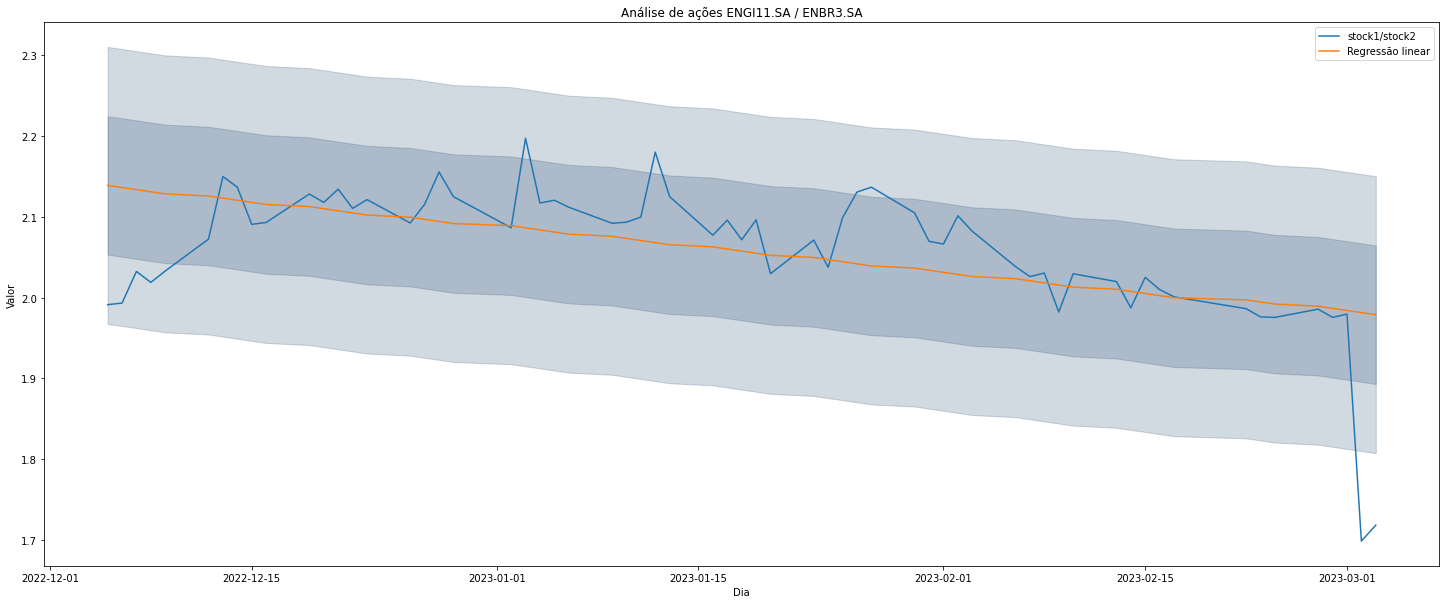

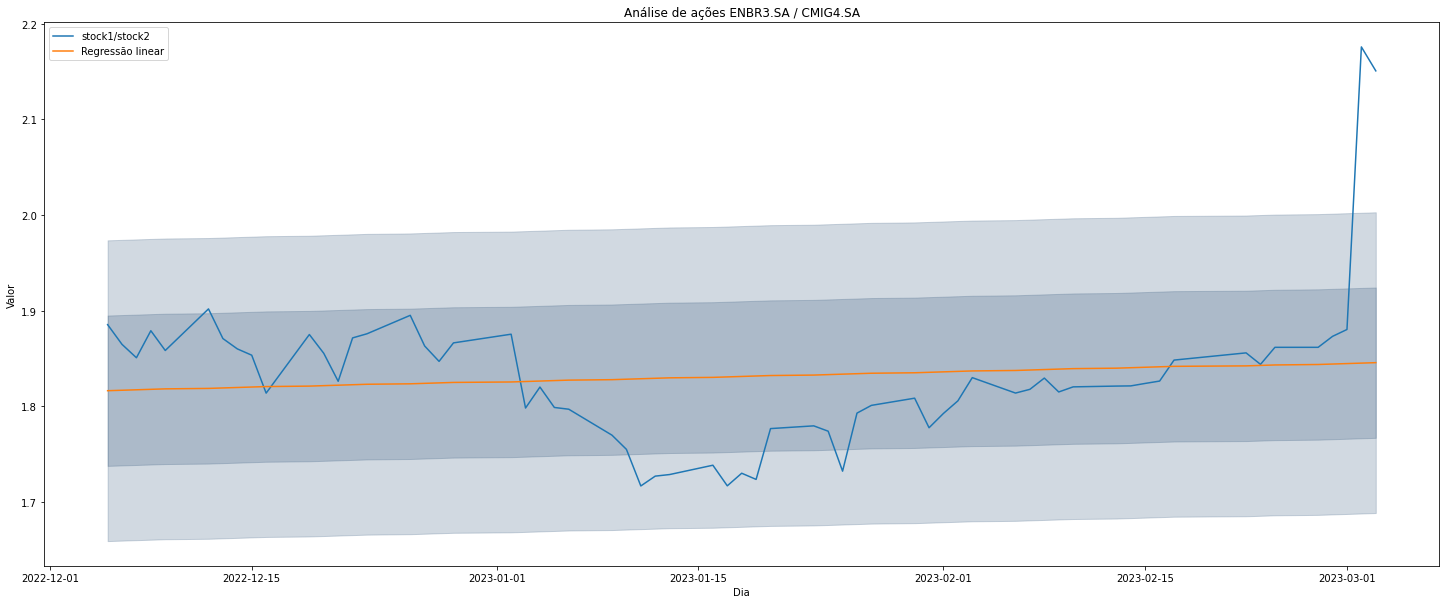

In [8]:
for index, row in alerta.iterrows():
    plot(row['acao_1'], row['acao_2'], resultados)
